# Time Series Analysis on Unemployment Rate

## Data Introduction

We will be working with data from Fred: [Unemployment Rate from 1938 to 2021](https://fred.stlouisfed.org/series/UNRATE)

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
unrate = pd.read_csv('/Users/chunyuzhang/Desktop/Kaggle/UNRATE.csv')

In [6]:
unrate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [7]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    878 non-null    object 
 1   UNRATE  878 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.8+ KB


#### Plot the time series, along with any logical or necessary differences to get a stationary dataset.

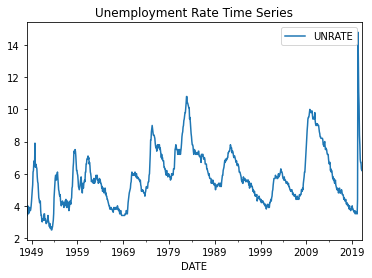

In [8]:
unrate.index = pd.to_datetime(unrate.DATE)
unrate.plot()
plt.title('Unemployment Rate Time Series')
plt.show()

Let's try plotting the difference:

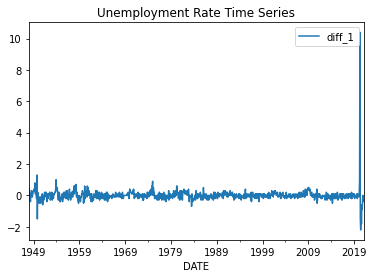

In [10]:
unrate['diff_1'] = unrate.UNRATE - unrate.UNRATE.shift()
unrate.plot(y='diff_1')
plt.title('Unemployment Rate Time Series')
plt.show()

#### Generate and interpret a PACF for the time series (and/or its differences).

Text(0.5, 1.0, 'Unemployment Rate PACF')

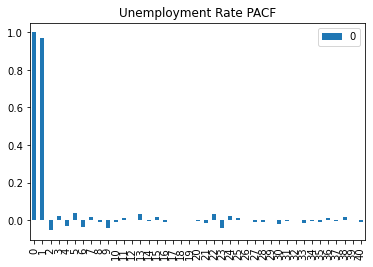

In [12]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(unrate.UNRATE))
x_acf.plot(kind='bar')
plt.title("Unemployment Rate PACF")

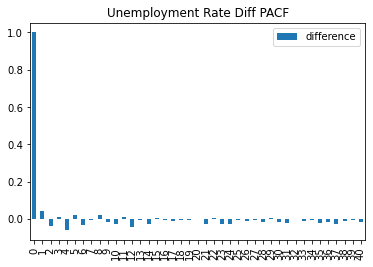

In [13]:
x_acf = pd.DataFrame(pacf(unrate.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment Rate Diff PACF")
plt.legend(['difference'])

#### Generate five ARIMA specifications and evaluate their efficacy at modeling your data.

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(unrate.UNRATE, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  877
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -495.214
Method:                           css   S.D. of innovations              0.426
Date:                Wed, 10 Mar 2021   AIC                            994.429
Time:                        21:46:14   BIC                           1003.982
Sample:                    02-01-1948   HQIC                           998.082
                         - 02-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.014      0.222      0.824      -0.025       0.031
Residuals Description
count    8.770000e+02
mean     2.823744e-09
std      4.258366e-01
min     -2.203193e+00
25%     -1.031927e-01

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [15]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(unrate.UNRATE, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  878
Model:                     ARMA(1, 0)   Log Likelihood                -490.288
Method:                       css-mle   S.D. of innovations              0.422
Date:                Wed, 10 Mar 2021   AIC                            986.575
Time:                        21:46:40   BIC                           1000.908
Sample:                    01-01-1948   HQIC                           992.057
                         - 02-01-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7038      0.442     12.909      0.000       4.838       6.570
ar.L1.UNRATE     0.9688      0.008    117.791      0.000       0.953       0.985
                                    Roots   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(unrate.UNRATE, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  878
Model:                     ARMA(1, 1)   Log Likelihood                -488.706
Method:                       css-mle   S.D. of innovations              0.422
Date:                Wed, 10 Mar 2021   AIC                            985.412
Time:                        21:46:53   BIC                           1004.523
Sample:                    01-01-1948   HQIC                           992.721
                         - 02-01-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7097      0.419     13.635      0.000       4.889       6.530
ar.L1.UNRATE     0.9649      0.009    106.838      0.000       0.947       0.983
ma.L1.UNRATE     0.0636      0.036      1.78

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [21]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(unrate.UNRATE, order=(1,1,1))
model_111_fit = model_111.fit()

print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  877
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -480.659
Method:                       css-mle   S.D. of innovations              0.416
Date:                Wed, 10 Mar 2021   AIC                            985.318
Time:                        21:49:55   BIC                           1042.636
Sample:                    02-01-1948   HQIC                          1007.241
                         - 02-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.002      1.302      0.193      -0.001       0.005
ar.L1.D.UNRATE    -0.4698      0.018    -26.227      0.000      -0.505      -0.435
ar.L2.D.UNRATE     0.4347      0.019

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(unrate.UNRATE, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  877
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -480.659
Method:                       css-mle   S.D. of innovations              0.416
Date:                Wed, 10 Mar 2021   AIC                            985.318
Time:                        21:50:09   BIC                           1042.636
Sample:                    02-01-1948   HQIC                          1007.241
                         - 02-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.002      1.302      0.193      -0.001       0.005
ar.L1.D.UNRATE    -0.4698      0.018    -26.227      0.000      -0.505      -0.435
ar.L2.D.UNRATE     0.4347      0.019

Text(0.5, 1.0, 'Histogram of Residuals')

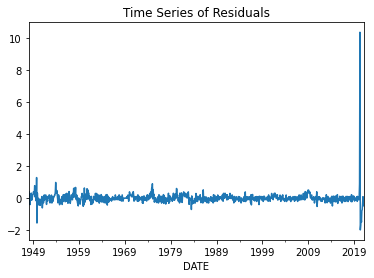

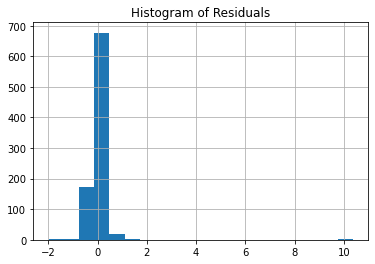

In [23]:

residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

Finally, choose one specification and make a case for it as a logical model for your dataset.